In [42]:
%matplotlib inline

import matplotlib
import autograd.numpy as np
import matplotlib.pyplot as plt
import random
import math
from autograd import grad

def generateChevronData():
    xBounds = [-50, 50]
    yBounds = [-50, 50]
    totalPoints = 100
    
    points = []
    targets = []
    
    for i in range(0, totalPoints):
        x = random.randint(xBounds[0], xBounds[1])
        y = random.randint(yBounds[0], yBounds[1])
        
        if x >= y and x <= -y:
            points.append([1, x/50.0,y/50.0])
            targets.append(0)
        else:
            points.append([1, x/50.0,y/50.0])
            targets.append(1)
        
    return np.array(points), np.array(targets)

def plotLine(points):
    xs = [x[1] for x in points]
    ys = [y[2] for y in points]
    
    plt.plot(xs, ys, color='r',linestyle='-')

def plotScatter(points):
    xs = [x[1] for x in points]
    ys = [y[2] for y in points]
    
    plt.scatter(xs, ys)

In [43]:
def sigmoid(phi):
    return 1.0/(1.0 + np.exp(-phi))

def MSE(weights):
    localPoints = np.array(list(map(lambda x: (x[1] - weights[1])**2 + (x[2] - weights[2])**2 <= radius**2, points)))
    predictions = logisticPrediction(weights, points)
    
    s = 0
    for i in range(0, len(points)):
        if localPoints[i]:
            s += (targets[i] - predictions[i])**2
    
    return 1.0/2.0 * s

def logisticPrediction(weights, p):
    ins = np.array(list(map(lambda x: predict(weights, x), p)))
    return ins
    
def predict(weights, i):
    return sigmoid((i[2] - weights[2]) - weights[0] * (i[1] - weights[1]))

In [44]:
def computeGradient(weights, example, target):
    prediction = predict(weights, example)
    E = -np.log(target * prediction + (1-target) * (1-prediction))
    dE_dO = computeErrorDifferential(prediction, target)
    
    dO_dZ = prediction * (1-prediction)
    
    dZ_dy = -1
    dZ_dm = weights[1] - example[1]
    dZ_dx = weights[0]
    
    dE_dZ = dE_dO * dO_dZ
    
    grad = np.zeros(3)
    grad[0] = dZ_dm * dE_dZ
    grad[1] = dZ_dx * dE_dZ
    grad[2] = dZ_dy * dE_dZ
    
    return grad, E

def computeErrorDifferential(prediction, target):
    return -(target - prediction)

In [51]:
def trainBoundaryHunter():
    iPoints = []
    weights = np.array([0.0, 0.5, -1.0])
    
    print("Initial Loss: ", MSE(weights))
    for i in range(0, 10000):
        if i % 1000 == 0:
            iPoints.append(np.copy(weights))

        weights, error = computeStep(weights)
    
        if i % 1000 == 0:
            print("Loss After [i = " + str(i) + "]: " + str(MSE(weights)))
            print(weights)
            
    print("Trained Loss: ", MSE(weights))    
    print("Weights: ", weights)
    return weights, iPoints

def computeStep(weights):
    totalG = np.zeros(3)
    totalE = 0
    
    localPoints = np.array(list(map(lambda x: (x[1] - weights[1])**2 + (x[2] - weights[2])**2 <= radius**2, points)))

    
    for i in range(0, len(points)):
        if not localPoints[i]:
            continue
        
        g, error = computeGradient(weights, points[i], targets[i])
        totalE += error
        totalG += g     
        
    totalG = totalG * (1/len(points))
    totalE = totalE * (1/len(points))
        
    weights -= totalG * 0.01
    return weights, totalE

Type 0:  35
Type 1:  65
Initial Loss:  2.66418559238

Loss Before: 2.66418559238
Loss After [i = 0]: 2.66397446975
[ -4.51659132e-05   5.00000000e-01  -9.99861894e-01]

Loss Before: 2.87275880157
Loss After [i = 1000]: 2.8726000365
[-0.04980621  0.50284119 -0.87447753]

Loss Before: 2.79568851602
Loss After [i = 2000]: 2.79557273159
[-0.10794624  0.51083203 -0.77155495]

Loss Before: 2.92669421304
Loss After [i = 3000]: 2.92657977233
[-0.1691838   0.52262876 -0.68606261]

Loss Before: 3.17696762669
Loss After [i = 4000]: 3.17688371674
[-0.24142315  0.53815337 -0.60966047]

Loss Before: 3.16589412229
Loss After [i = 5000]: 3.1658251865
[-0.31409254  0.55089689 -0.56326549]

Loss Before: 3.02874041136
Loss After [i = 6000]: 3.0286897393
[-0.37969888  0.56342157 -0.52694526]

Loss Before: 3.04004323986
Loss After [i = 7000]: 3.04000014956
[-0.4427727   0.57363864 -0.50195789]

Loss Before: 2.99860766776
Loss After [i = 8000]: 2.99856775573
[-0.50576314  0.57926248 -0.49005138]

Loss Befor

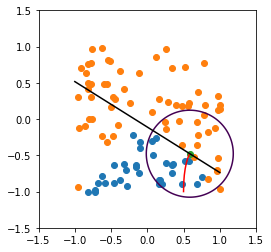

In [52]:
random.seed(1234)
points, targets = generateChevronData()

plt.axis([-1.5, 1.5, -1.5, 1.5])

# Plot points on graph
c1 = []
c2 = []

for i in range(0, len(points)):
    if targets[i] == 0:
        c1.append(points[i])
    else:
        c2.append(points[i])

print("Type 0: ", len(c1))
print("Type 1: ", len(c2))
        
plotScatter(c1)
plotScatter(c2)

radius = 0.6

weights, iPoints = trainBoundaryHunter()
plotLine(iPoints)
plt.scatter(weights[1], weights[2])
plt.plot([-1.0, 1.0], [weights[2] + weights[0]*((-1) - weights[1]), weights[2] + weights[0]*(1 - weights[1])], 'k-')

x = np.linspace(-1.5, 1.5, 500)
y = np.linspace(-1.5, 1.5, 500)
X, Y = np.meshgrid(x,y)
F = ((X - weights[1]))**2 + ((Y - weights[2]))**2 - radius**2
plt.contour(X,Y,F,[0])

plt.gca().set_aspect('equal')

plt.show()